In [1]:
import sys
import os 
# loads in the parent folder directory
sys.path.append(os.path.abspath("../"))
from src.bts import *


In [2]:
# load cached dataset
path = kagglehub.dataset_download(
    "thedevastator/240000-household-electricity-consumption-records"
)

# load and preprocess data
csv_path = os.path.join(path, "household_power_consumption.csv")
df = preproc(csv_path)

Percentage of missing data: 1.447%


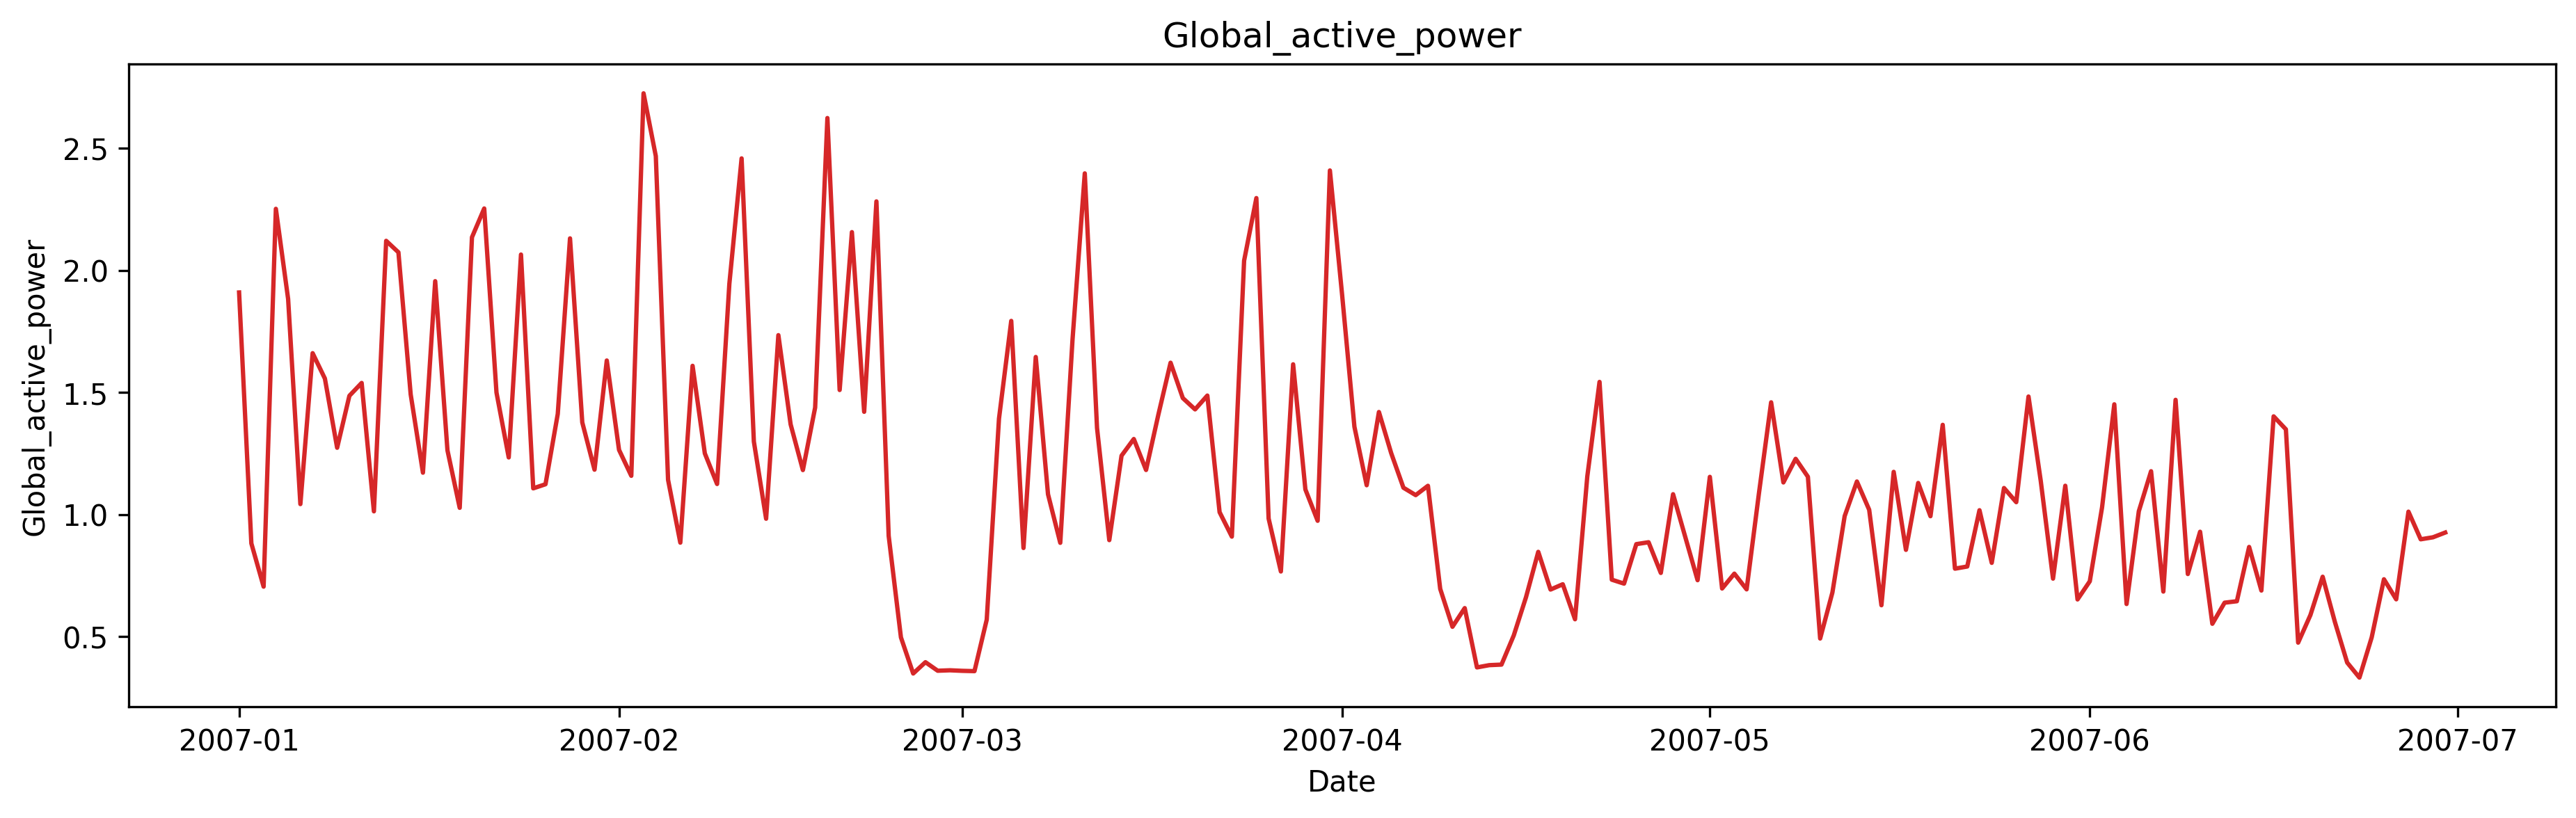

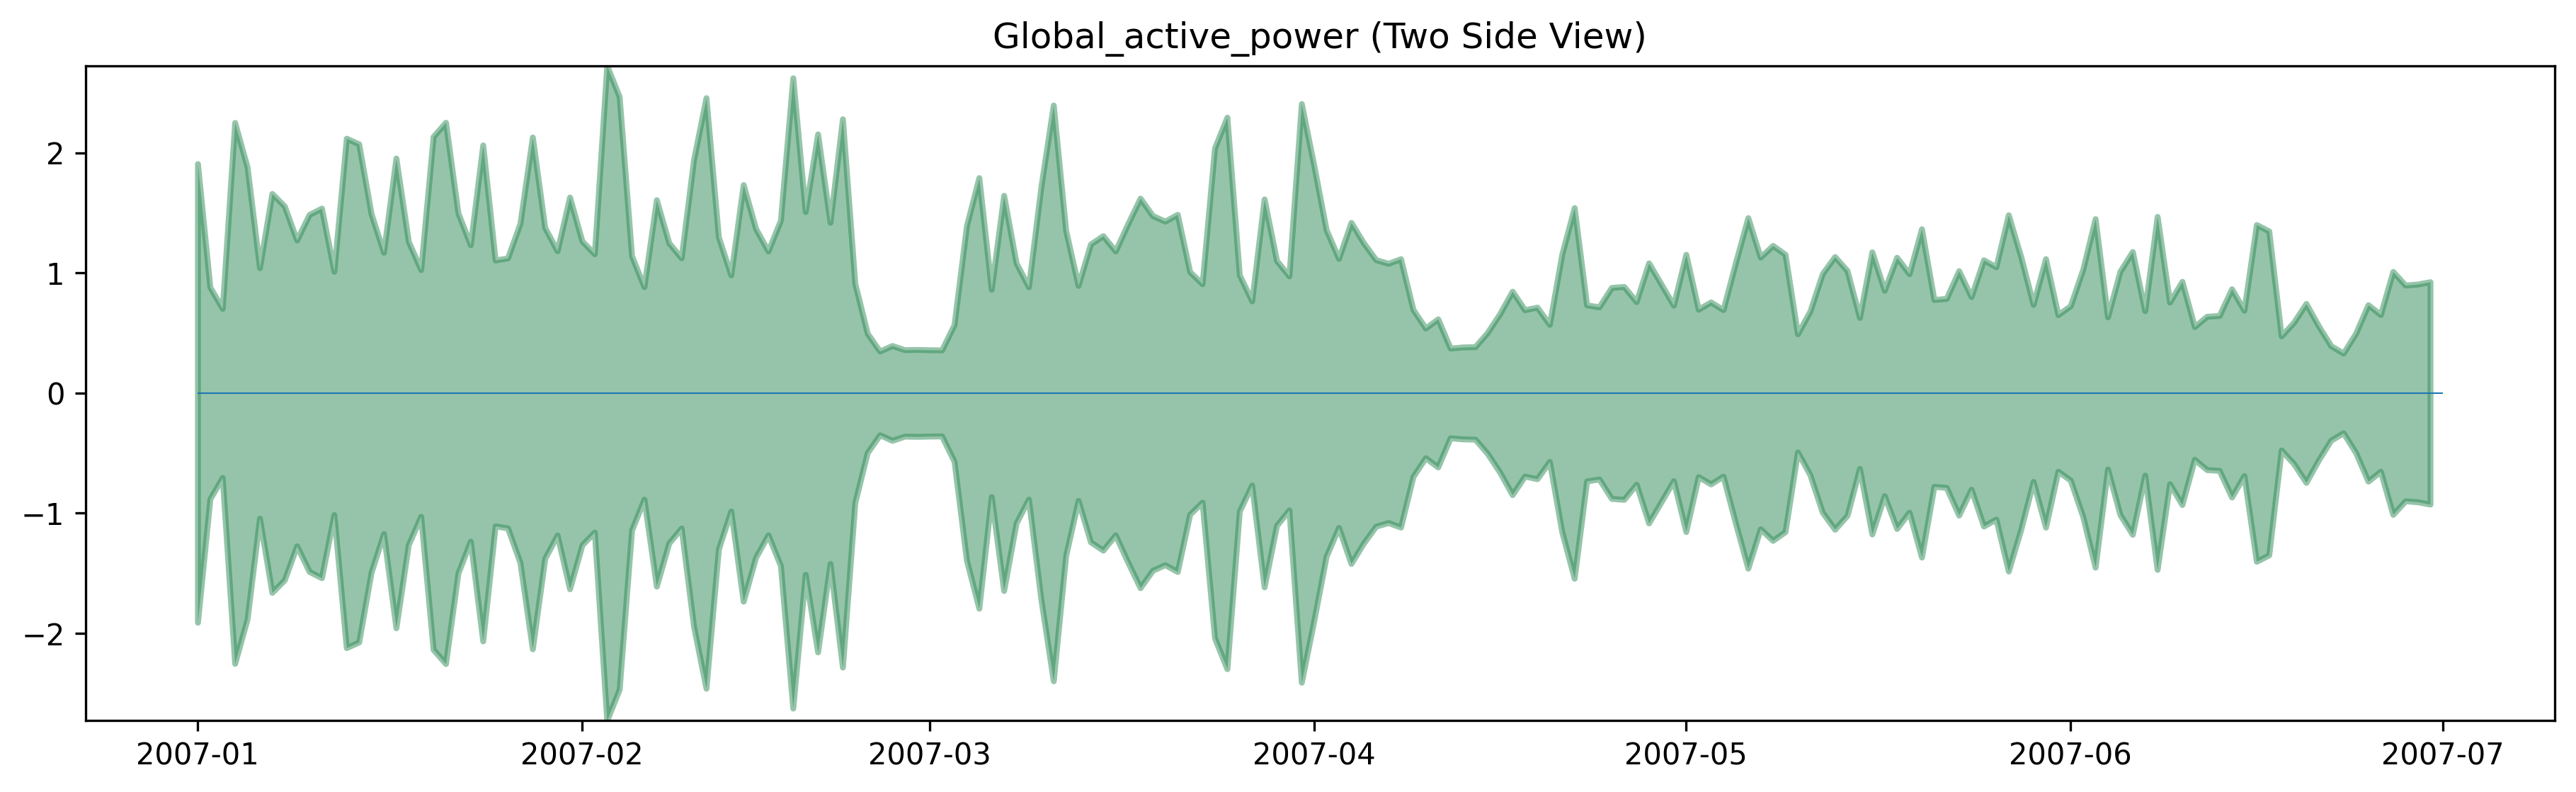

In [3]:
# early data visualisation 
df_temp = resample(df, time='daily') # allows us to resample the data ['none', 'hourly', 'daily','monthly']
plot_df(df, df_temp.index, df_temp['Global_active_power'], title="Global_active_power", xlabel='Date', ylabel='Global_active_power', dpi=300)

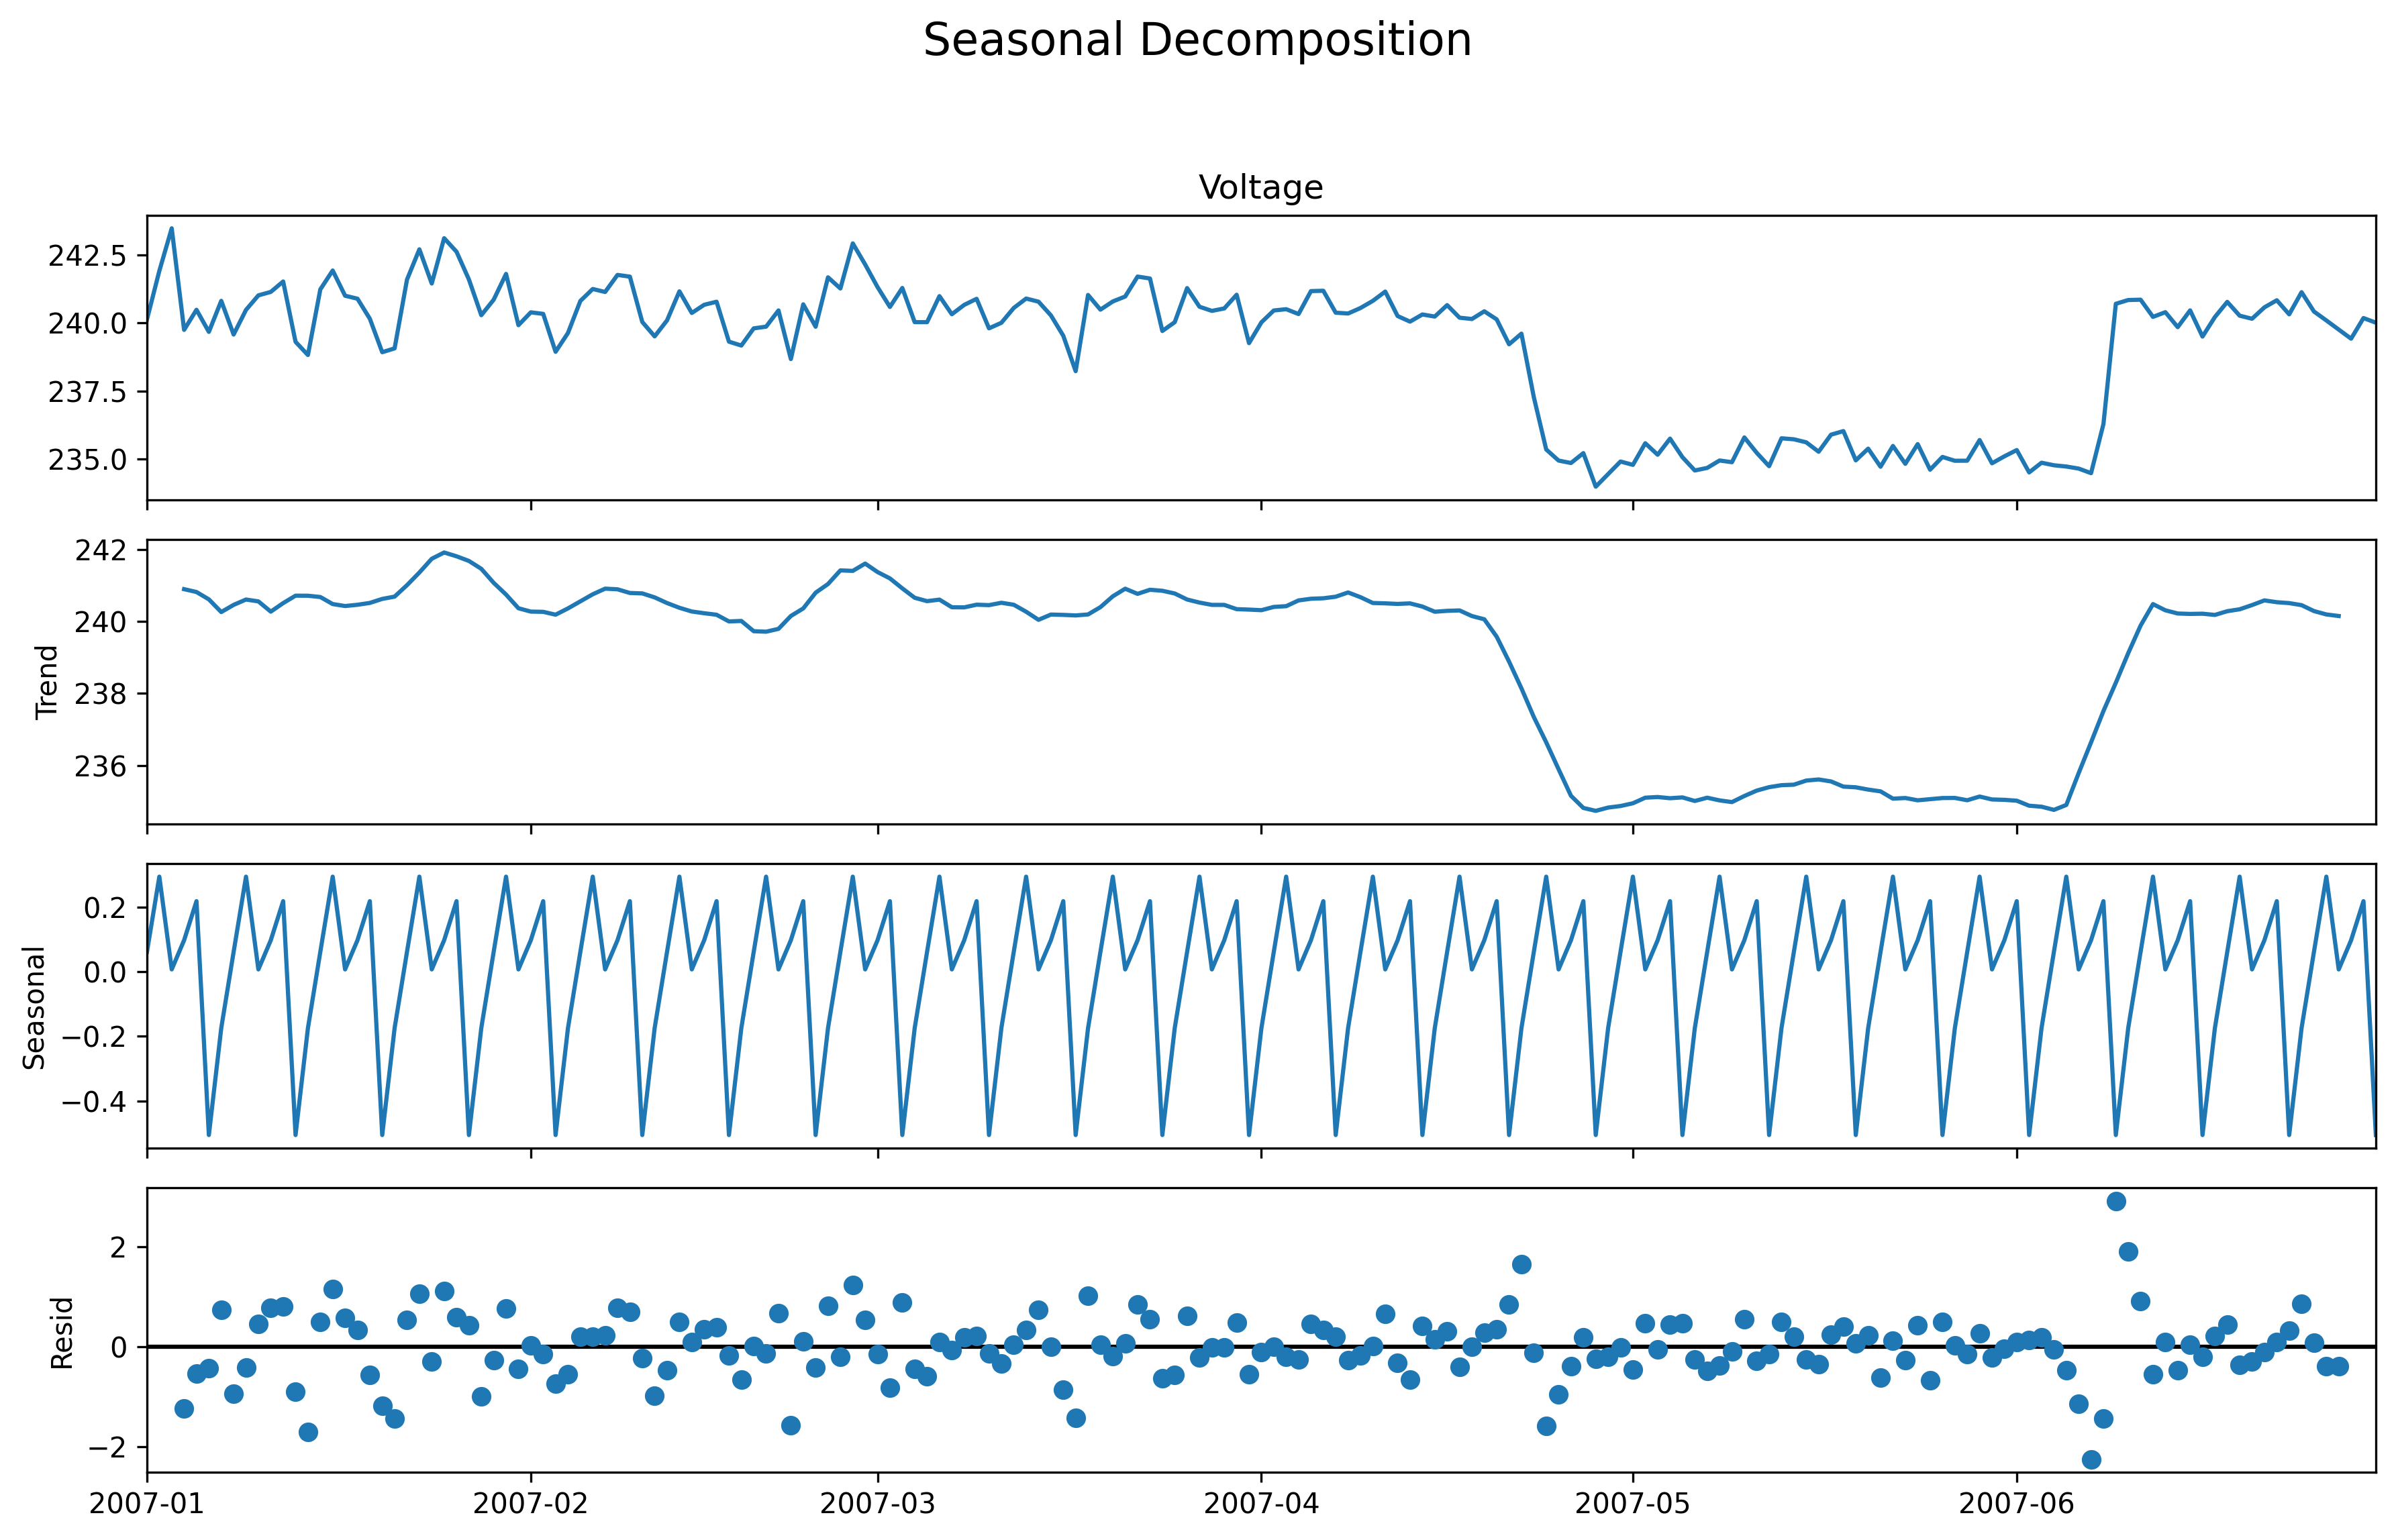

In [4]:
# eda for seasonal trend
dfres = resample(df, time='daily')
series = seasonal(dfres, variable='Voltage', model='additive', period=7) # period looks at over how long we think the cycle occurs
plot_seasonal_decompose(series, model='additive', title="Seasonal Decomposition", figsize=(12, 8))

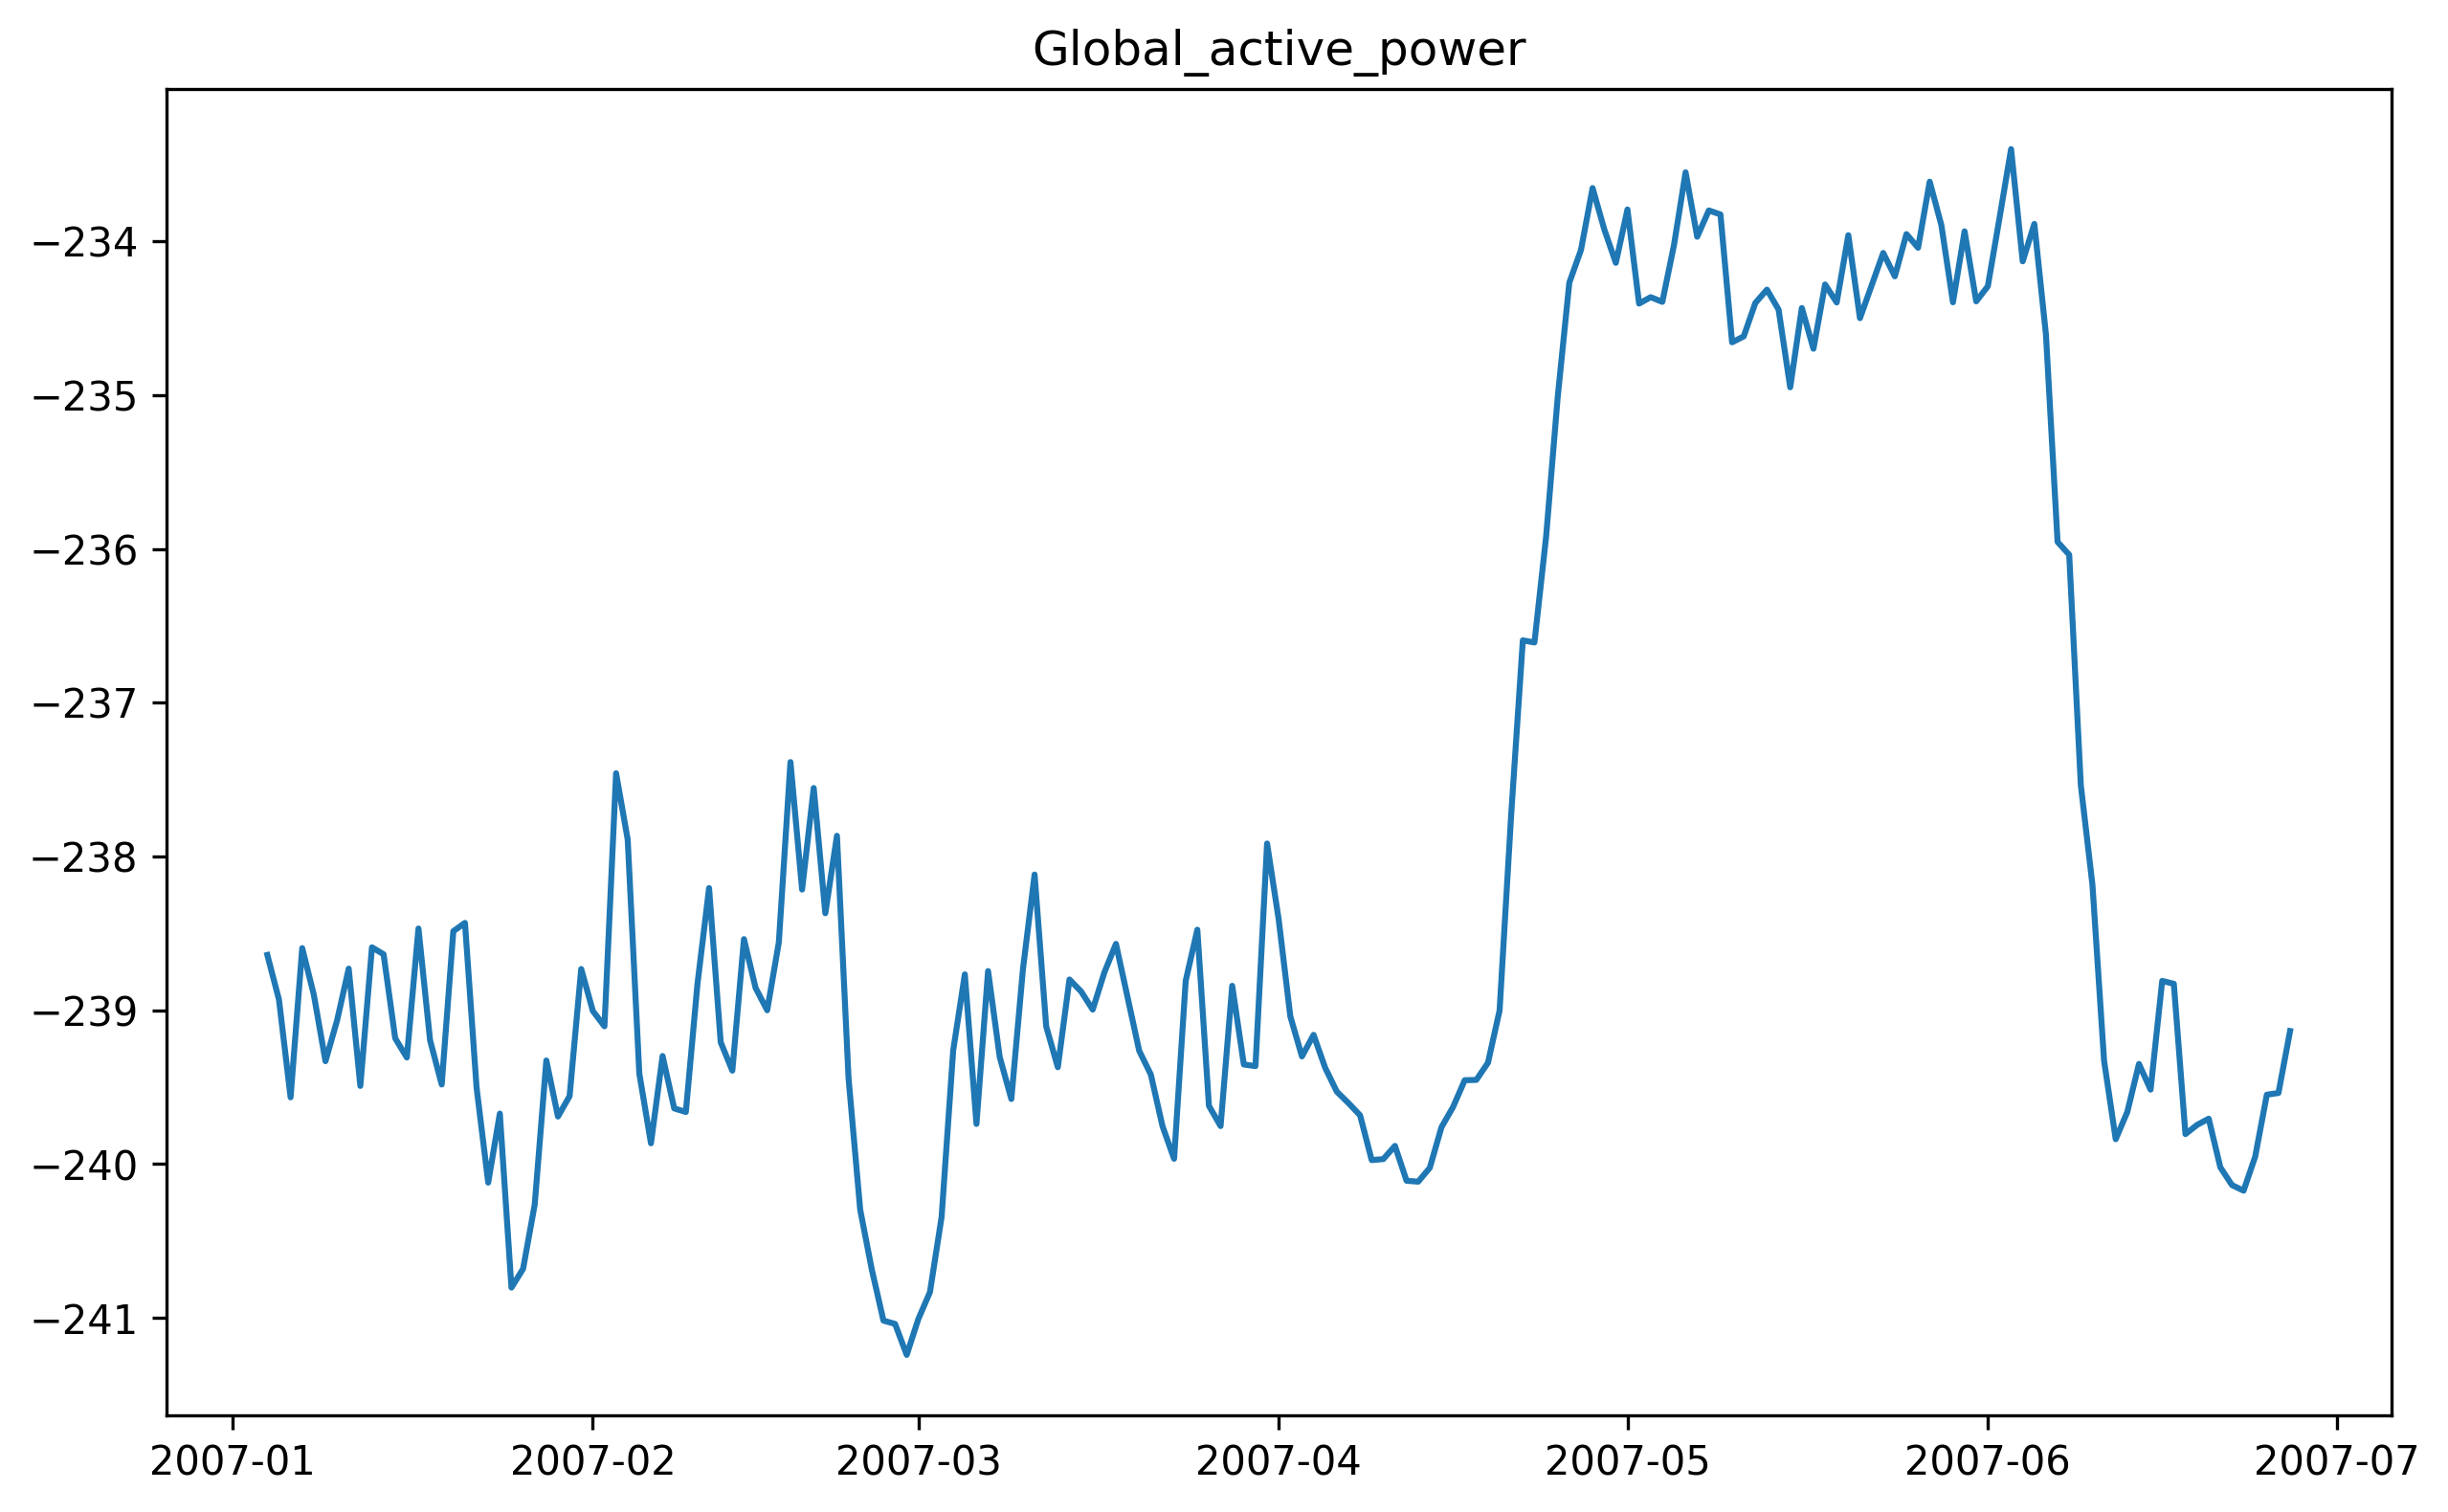

In [5]:
# eda for seasonal trend
dfres = resample(df, time='daily')
series = seasonal(dfres, variable='Voltage', model='additive', period=7) # period looks at over how long we think the cycle occurs
detrended = dfres['Global_active_power'].values - series._trend # detrended component
plt.figure(figsize=(10, 6))
plt.plot(detrended, scalex=True)
plt.title('Global_active_power', fontsize=12)
plt.show()

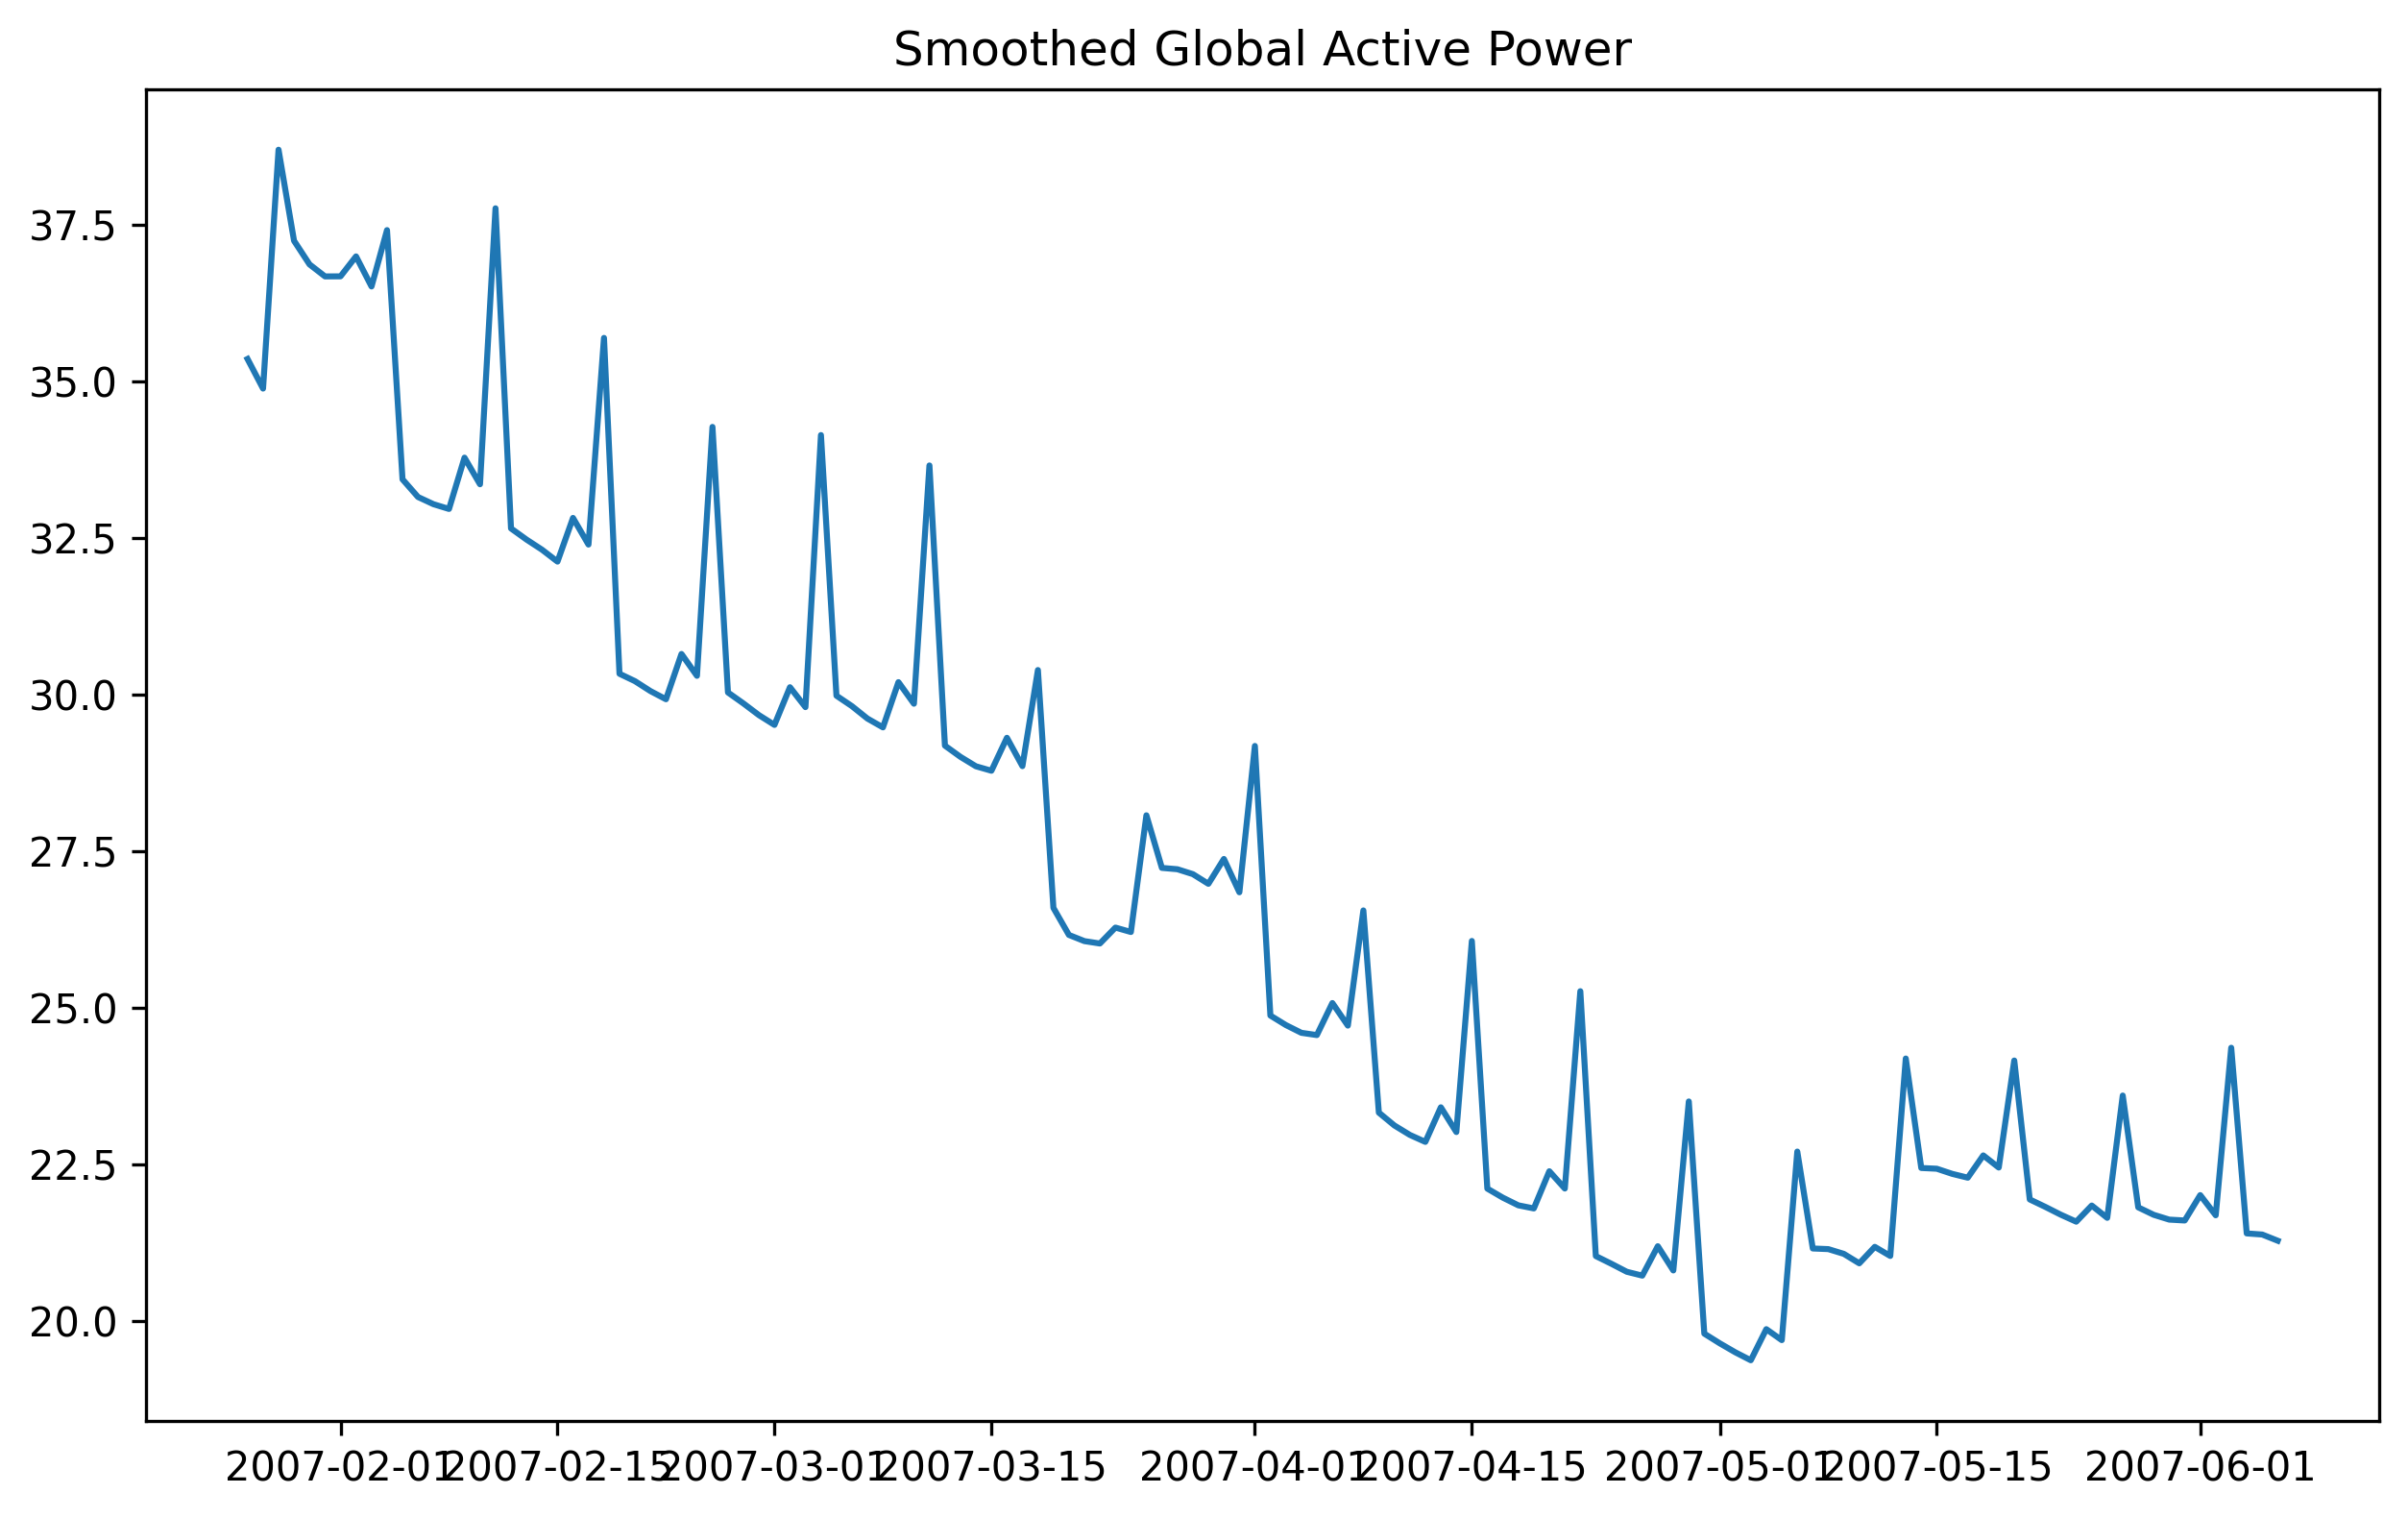

In [6]:
# eda for seasonal trend
dfres = resample(df, time='daily')
series = seasonal(dfres, variable='Voltage', model='additive', period=7) # period looks at over how long we think the cycle occurs
dfres['deseasonalised'] = dfres['Global_active_power'].values / series.seasonal # remove the affect of season

# Smooth with a rolling mean (choose window size)
dfres['smooth'] = dfres['deseasonalised'].rolling(window=50, center=True).mean() # heavily smoothed trend to understand what is going on. 
plt.figure(figsize=(10, 6))
plt.plot(dfres['smooth'], label='Smoothed')
plt.title('Smoothed Global Active Power')
plt.show()


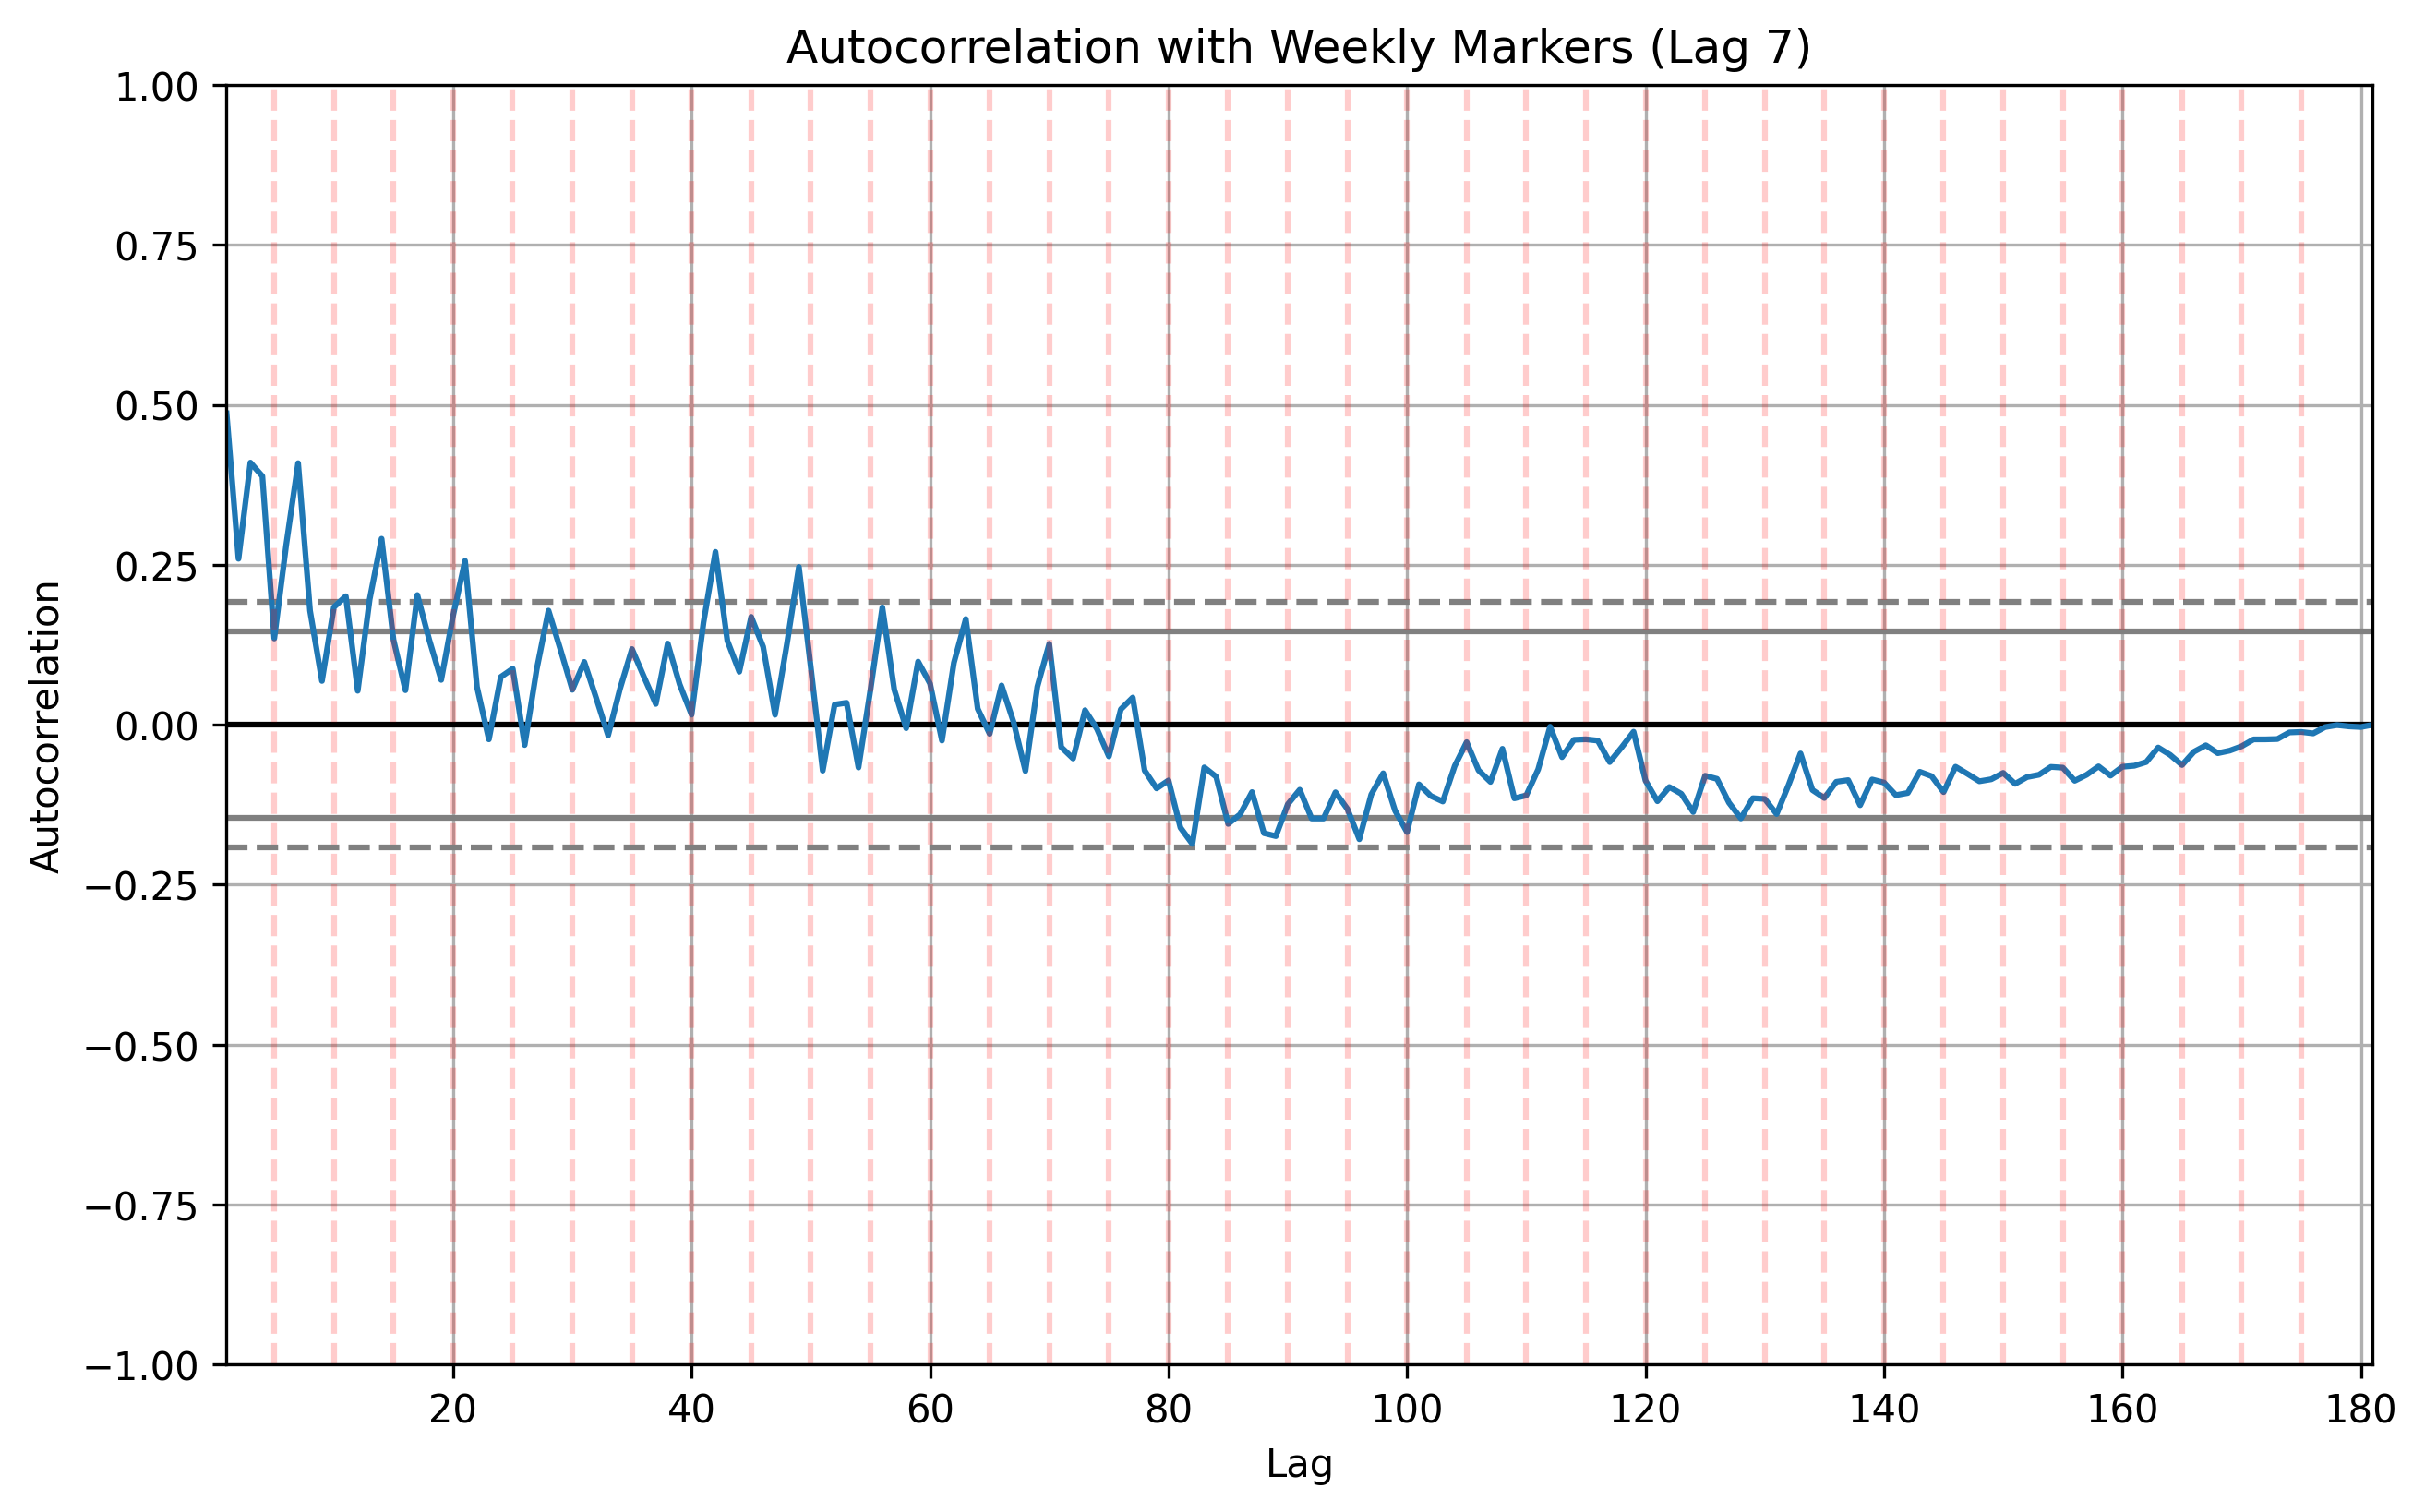

In [10]:
# test for seasonality
plt.rcParams.update({'figure.figsize':(10,6), 'figure.dpi':300})
autocorrelation_plot(dfres['Global_active_power'].tolist())

max_lag = 180   # Adjust depending on your plot's x-axis
for lag in range(5, max_lag, 5):
    plt.axvline(x=lag, color='red', linestyle='--', alpha=0.2) # we can see that the start of the peaks tend to correlate with the start of the weekend 

plt.title("Autocorrelation with Weekly Markers (Lag 7)")
plt.show()

/Users/gabrielhaw/Desktop/timeseries/src/bts.py:53: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df = df.resample("H").mean().interpolate().bfill().ffill()


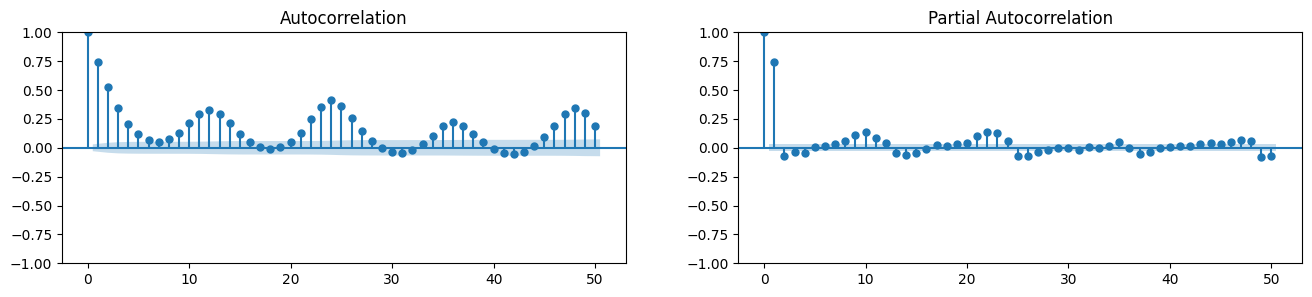

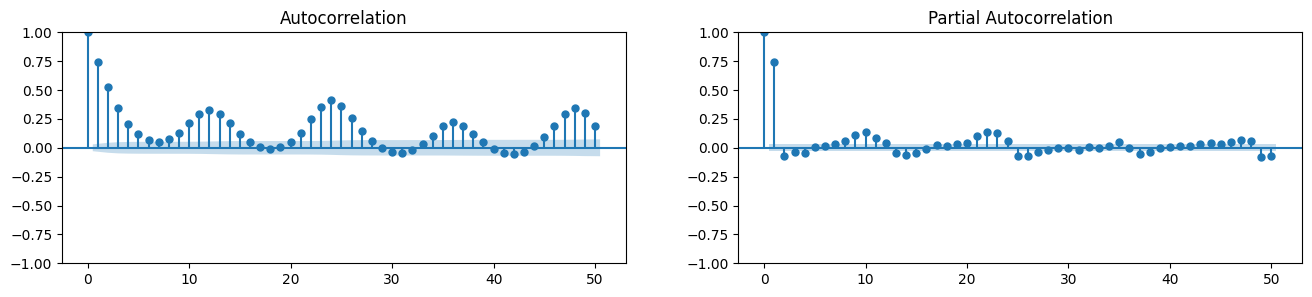

In [14]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

df_temp = resample(df, time='hourly')
# Draw Plot
fig, axes = plt.subplots(1,2,figsize=(16,3), dpi= 100)
plot_acf(df_temp['Global_active_power'].tolist(), lags=50, ax=axes[0])
plot_pacf(df_temp['Global_active_power'].tolist(), lags=50, ax=axes[1])